# Pre-selection of optical data G7.7-3.7 
### In this Jupyter notebook:
- Filtering individual images for number of detected stars and their median FWHM
- Image airmass comparison
- PSF matching

In [1]:
from astropy.io import fits
from matplotlib import cm
from astropy.visualization import (MinMaxInterval, ZScaleInterval, SqrtStretch, ImageNormalize)
import matplotlib.pyplot as plt
import numpy as np
import platform
import glob
import os
import time
from astropy.wcs import WCS
import aplpy
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
print(f"Node Name: {platform.uname().node}")

if platform.uname().node == 'artemis':
    int_raw_data_path = '/media/vdomcek/Storage/work/2019_INT_La_Palma/'
    int_dropbox_path = '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/'
    print(f'Path:', int_raw_data_path)
if platform.uname().node == 'prometheus':
    print('You are on a wrong computer')

Node Name: artemis
Path: /media/vdomcek/Storage/work/2019_INT_La_Palma/


# SEXtractor results (Source EXtractor)

In [3]:
work_dir = 'g7/ha/sextractor/'
names_sex = sorted(glob.glob(int_dropbox_path + work_dir + '*dat'))

In [4]:
f = open(names_sex[0])
for i in range(24):
    header = f.readline()
    print(header),
f.close()

#   1 NUMBER                 Running object number                                     

#   2 FLUX_ISO               Isophotal flux                                             [count]

#   3 FLUXERR_ISO            RMS error for isophotal flux                               [count]

#   4 MAG_ISO                Isophotal magnitude                                        [mag]

#   5 MAGERR_ISO             RMS error for isophotal magnitude                          [mag]

#   6 X_IMAGE                Object position along x                                    [pixel]

#   7 Y_IMAGE                Object position along y                                    [pixel]

#   8 ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]

#   9 DELTA_J2000            Declination of barycenter (J2000)                          [deg]

#  10 FLUX_RADIUS            Fraction-of-light radii                                    [pixel]

#  11 MAG_AUTO               Kron-like ellipti

## Distribution of fwhm in a single file - we take the median value

In [5]:
bins2= [0+0.2*i for i in range(100)]

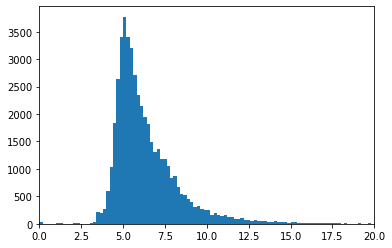

In [6]:
data = np.loadtxt(names_sex[2])
plt.hist(data[:,14], bins=bins2)
plt.xlim(0,20)
plt.show()

## Median FWHM (Full Width at Half Maximum) acquired from different files of the same filter

In [7]:
psf_vals, number_of_stars, split_names = np.array([]), np.array([]), np.array([])

for file in names_sex:
    data = np.loadtxt(file)
    split_names = np.append(split_names, file.split('/')[-1][:-7])
    psf_vals = np.append(psf_vals, np.median(data[:,14]))
    number_of_stars = np.append(number_of_stars, len(data[:,14]))
#     median_vals.append(np.median(data[:,14]))
print('PSF', psf_vals)
print(np.median(psf_vals), np.std(psf_vals))
# print('Number of Stars', number_of_stars)
print(split_names)

PSF [3.86  5.12  5.83  6.63  6.36  6.46  5.81  6.17  7.26  7.19  6.9   6.29
 3.31  3.37  3.42  3.46  3.91  3.66  3.45  3.47  3.75  3.61  3.64  3.7
 3.69  4.23  3.67  3.41  3.92  3.54  3.69  3.76  4.01  4.08  4.08  3.82
 4.46  4.37  4.56  4.58  4.07  4.37  4.52  4.94  4.7   5.07  4.16  4.75
 4.92  5.16  4.84  4.81  6.28  6.48  5.88  4.96  5.57  5.44  3.575 5.84
 7.68  3.82  3.77  4.74  5.51  3.4   3.445 2.55  2.47  5.41  3.78  4.355
 5.455 4.49  5.52  5.65  5.23  5.64  5.32  5.51  5.04  4.97  5.06  5.07
 5.65  5.59  5.81  6.19  6.56  6.72  7.35  7.14 ]
4.779999999999999 1.1775458031941
['coaddsex' 'r1471518' 'r1471519' 'r1471520' 'r1471521' 'r1471522'
 'r1471523' 'r1471524' 'r1471526' 'r1471527' 'r1471529' 'r1471531'
 'r1471704' 'r1471705' 'r1471706' 'r1471707' 'r1471708' 'r1471709'
 'r1471710' 'r1471711' 'r1471712' 'r1471713' 'r1471714' 'r1471715'
 'r1471716' 'r1471717' 'r1471718' 'r1471719' 'r1471720' 'r1471721'
 'r1471722' 'r1471723' 'r1471725' 'r1471726' 'r1471727' 'r1471728'
 'r147

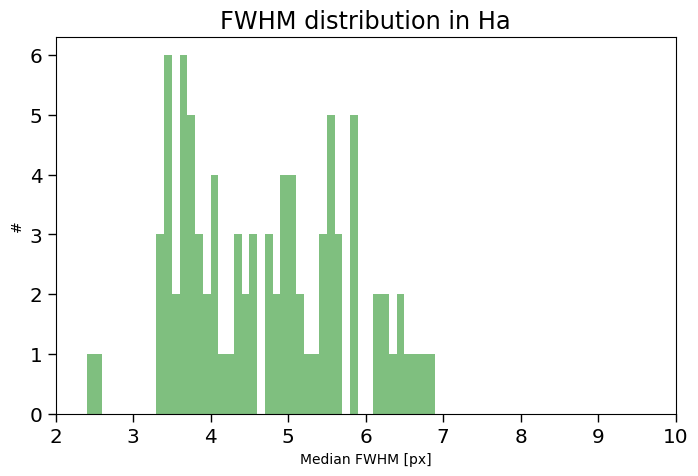

In [8]:
bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution in Ha')
ax.hist(psf_vals, bins=bins, alpha=0.5, color='green')

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('Median FWHM [px]')
ax.set_ylabel('#')
plt.show()


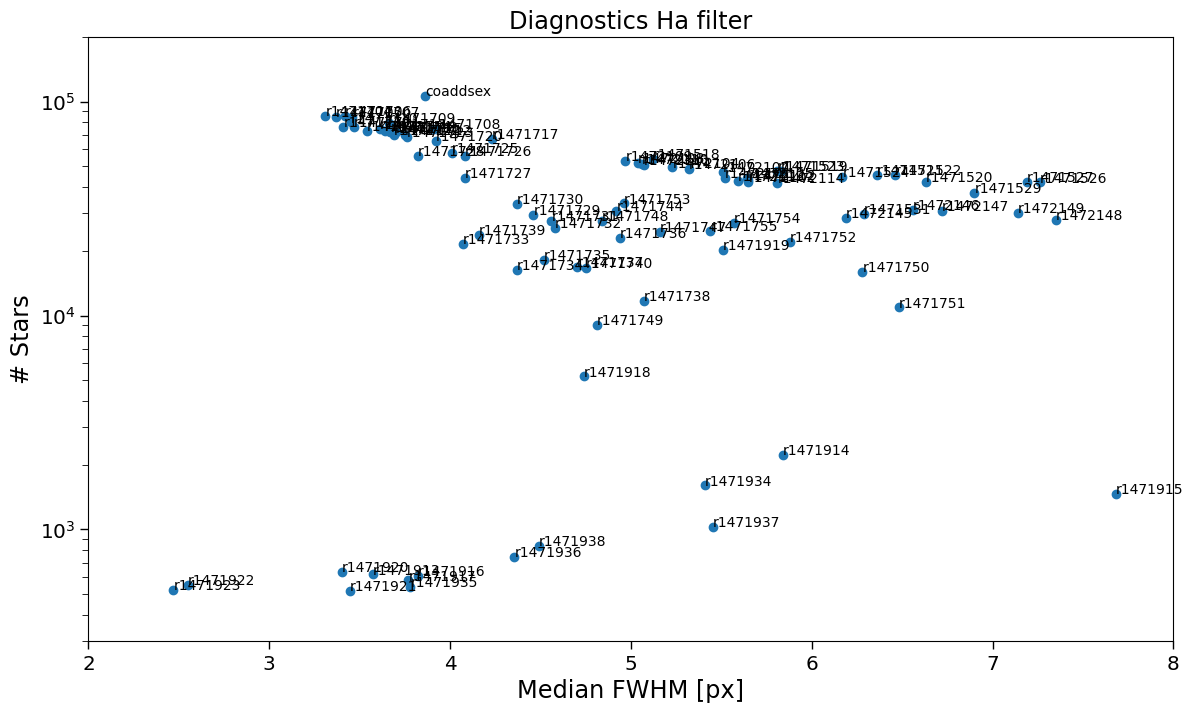

In [9]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics Ha filter')
ax.scatter(psf_vals, number_of_stars)
ax.set_xlim(2,8)
ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

# Filtering conditions:
- at least 4e4 stars
- better PSF than 6px

In [10]:
mask_low_flux = np.copy(number_of_stars)
mask_low_flux[mask_low_flux < 4e4] = False

mask_bad_psf = np.copy(psf_vals)
mask_bad_psf[mask_bad_psf > 6] = False

mask_bad = mask_bad_psf*mask_low_flux
mask_bad[mask_bad > 0] = True
print(mask_bad, np.sum(mask_bad))

[1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.] 41.0


In [11]:
# mask_names = np.array([])
# for i in range(len(mask_bad)):
#     if mask_bad[i] == False:
#         mask_names = np.append(mask_names, split_names[i])
# print(mask_names)
# for i in mask_names:
#     print('mv ' + i + '.fit trash')

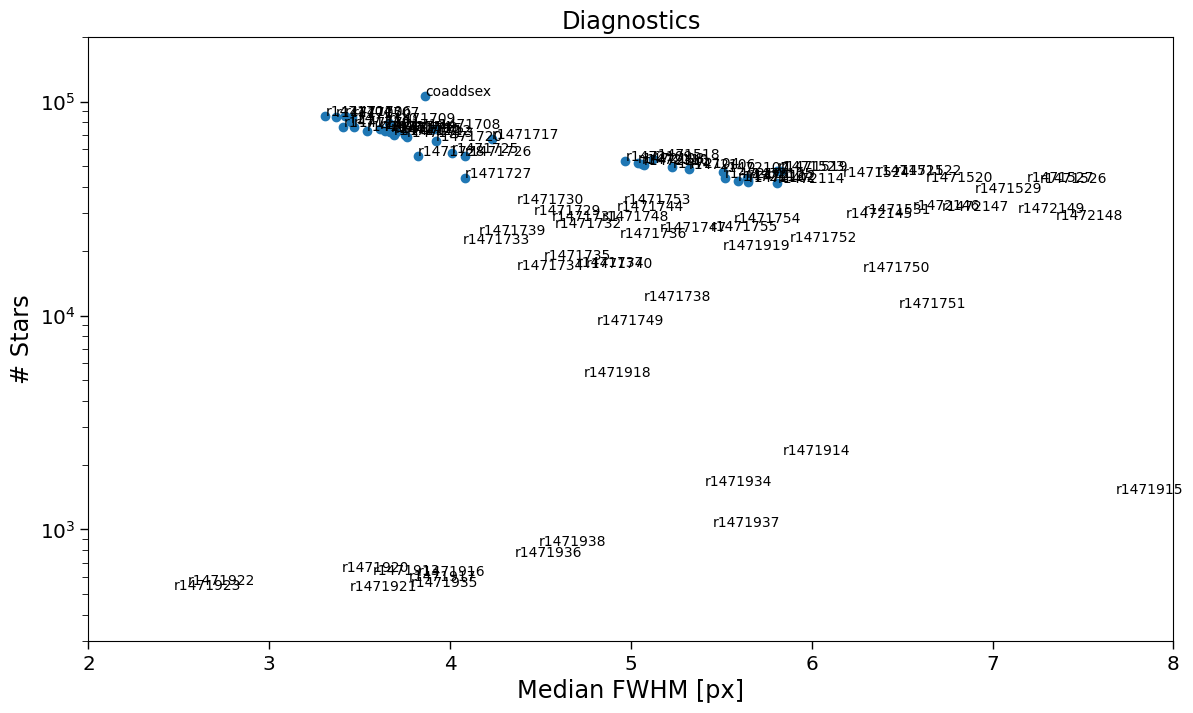

In [12]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics')
# ax.scatter(psf_vals, number_of_stars)
ax.scatter(psf_vals*mask_bad, number_of_stars*mask_bad)
ax.set_xlim(2,8)
ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

# r filter

In [13]:
# work_dir = 'g7/r/sextractor/'
# names_sex = sorted(glob.glob(int_dropbox_path + work_dir + '*dat'))
names_sex = sorted(glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/sextractor/*dat'))
print(names_sex)

['/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/sextractor/r1471699sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/sextractor/r1471700sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/sextractor/r1471701sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/sextractor/r1471702sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/sextractor/r1471703sex.dat']


In [14]:
psf_vals, number_of_stars, split_names = np.array([]), np.array([]), np.array([])

for file in names_sex:
    data = np.loadtxt(file)
    split_names = np.append(split_names, file.split('/')[-1][:-7])
    psf_vals = np.append(psf_vals, np.median(data[:,14]))
    number_of_stars = np.append(number_of_stars, len(data[:,14]))
#     median_vals.append(np.median(data[:,14]))
print('PSF', psf_vals)
print(np.median(psf_vals), np.std(psf_vals))
print('Number of Stars', number_of_stars)
print(split_names)

PSF [3.5  3.38 3.49 3.7  3.65]
3.5 0.11603447763488234
Number of Stars [111693. 116403. 115378. 107213. 110725.]
['r1471699' 'r1471700' 'r1471701' 'r1471702' 'r1471703']


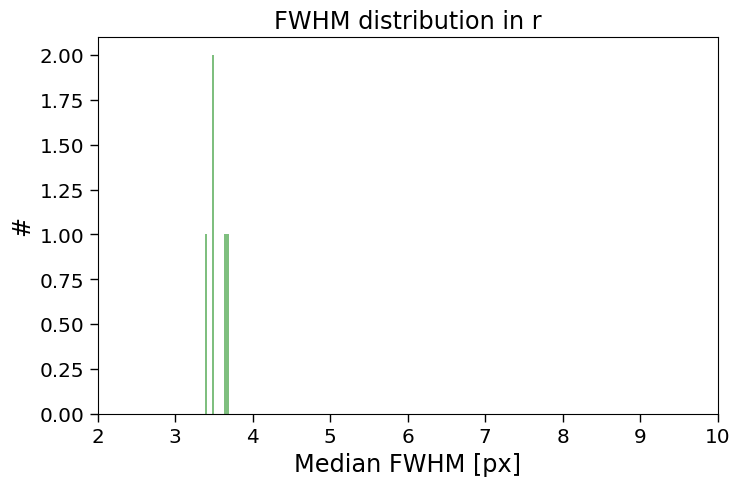

In [15]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution in r')
ax.hist(psf_vals, bins=10, alpha=0.5, color='green')

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('Median FWHM [px]')
ax.set_ylabel('#')
plt.show()

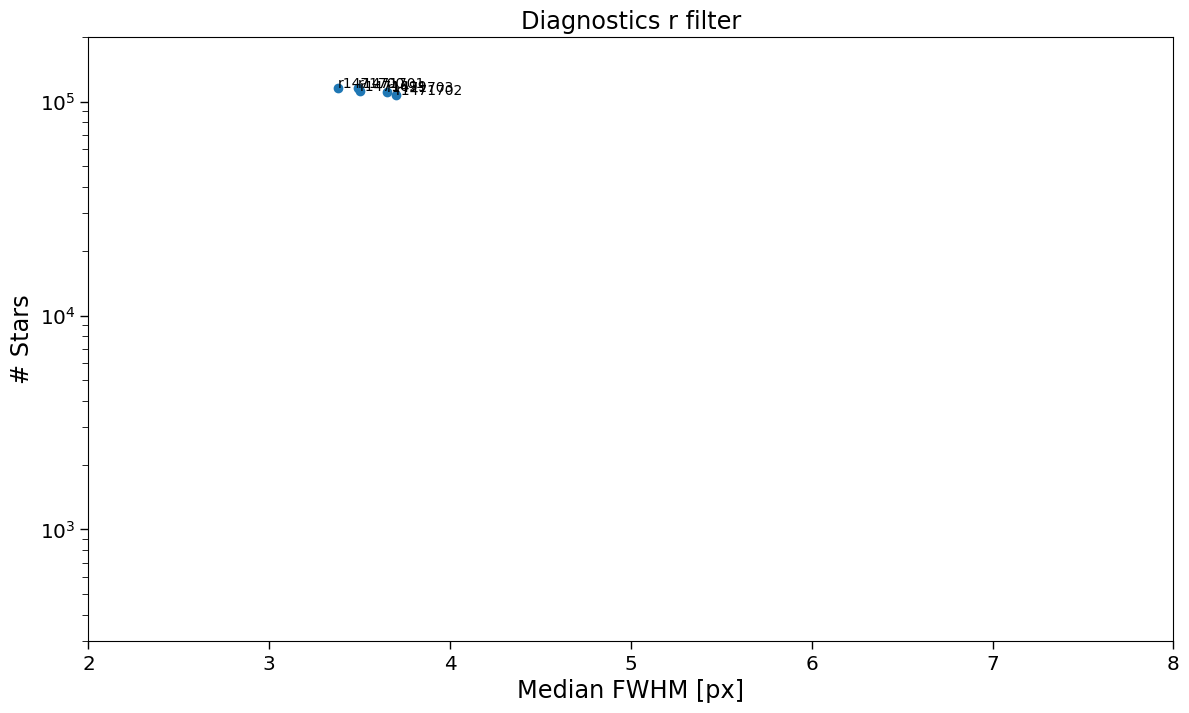

In [16]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics r filter')
ax.scatter(psf_vals, number_of_stars)
ax.set_xlim(2,8)
ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

### OIII, SII, Hbeta and g have so few files that I used visual inspection of individual images and selected the ones for further use. 
#### For completness I show the same outputs here. However, even the data with lower quality were in this case used.

## g filter

In [17]:
# work_dir = 'g7/g/sextractor/'
# names_sex = sorted(glob.glob(int_dropbox_path + work_dir + '*dat'))
names_sex = sorted(glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/sextractor/*dat'))
print(names_sex)

['/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/sextractor/r1472155sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/sextractor/r1472156sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/sextractor/r1472157sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/sextractor/r1472158sex.dat', '/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/sextractor/r1472159sex.dat']


In [18]:
psf_vals, number_of_stars, split_names = np.array([]), np.array([]), np.array([])

for file in names_sex:
    data = np.loadtxt(file)
    split_names = np.append(split_names, file.split('/')[-1][:-7])
    psf_vals = np.append(psf_vals, np.median(data[:,14]))
    number_of_stars = np.append(number_of_stars, len(data[:,14]))
#     median_vals.append(np.median(data[:,14]))
print('PSF', psf_vals)
print(np.median(psf_vals), np.std(psf_vals))
print('Number of Stars', number_of_stars)
print(split_names)

PSF [6.95 7.17 6.57 7.26 6.8 ]
6.95 0.24955961211702493
Number of Stars [32731. 30945. 36448. 31395. 34478.]
['r1472155' 'r1472156' 'r1472157' 'r1472158' 'r1472159']


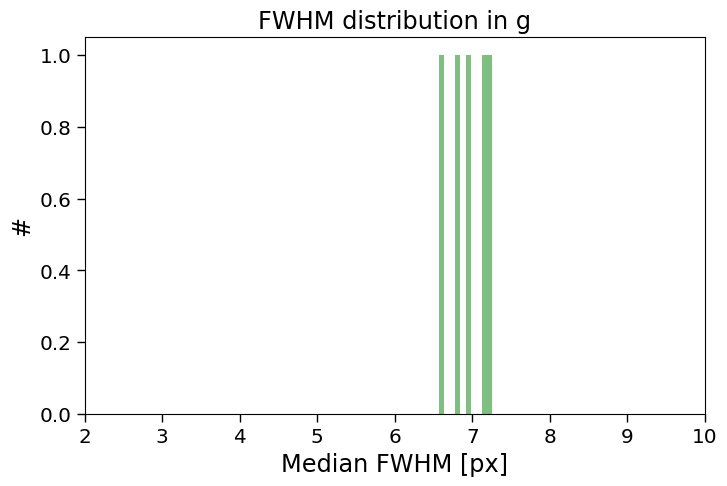

In [19]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution in g')
ax.hist(psf_vals, bins=10, alpha=0.5, color='green')

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('Median FWHM [px]')
ax.set_ylabel('#')
plt.show()

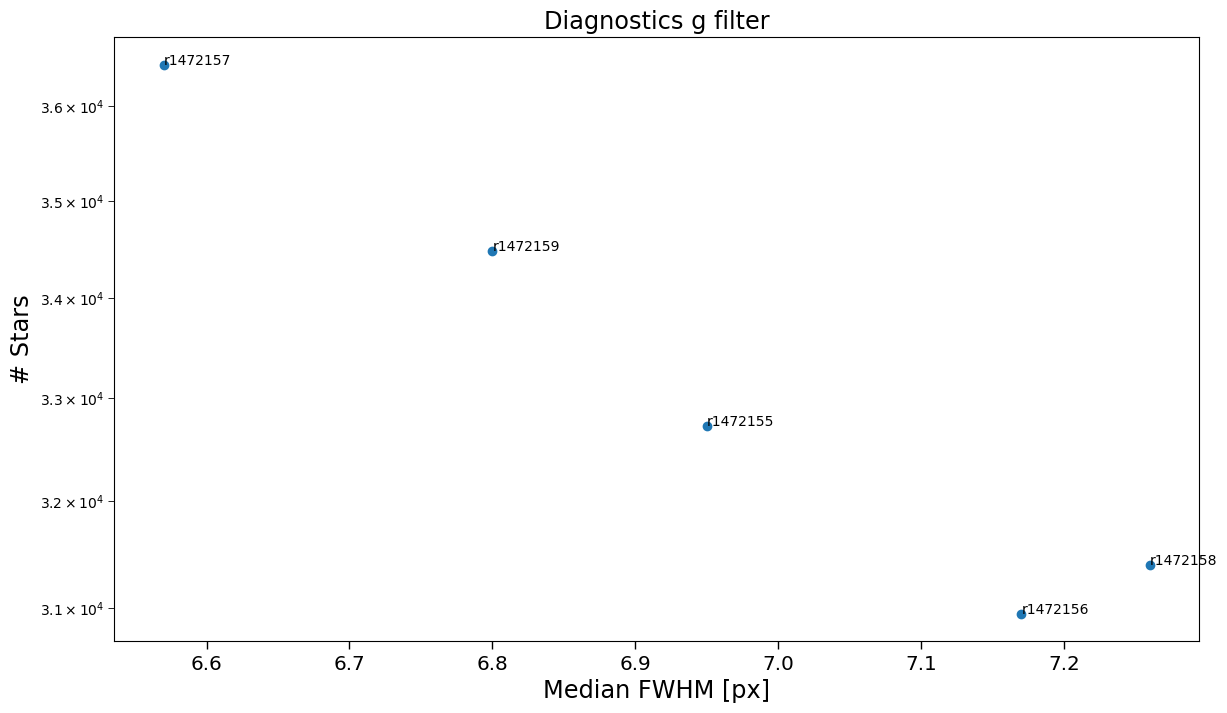

In [20]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics g filter')
ax.scatter(psf_vals, number_of_stars)
# ax.set_xlim(2,8)
# ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

## SII filter

In [21]:
work_dir = 'g7/s2/sextractor/'
names_sex = sorted(glob.glob(int_dropbox_path + work_dir + '*dat'))
print(names_sex)

['/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472120sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472121sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472122sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472123sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472124sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472150sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472151sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472152sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472153sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/s2/sextractor/r1472154sex.dat']


In [22]:
psf_vals, number_of_stars, split_names = np.array([]), np.array([]), np.array([])

for file in names_sex:
    data = np.loadtxt(file)
    split_names = np.append(split_names, file.split('/')[-1][:-7])
    psf_vals = np.append(psf_vals, np.median(data[:,14]))
    number_of_stars = np.append(number_of_stars, len(data[:,14]))
#     median_vals.append(np.median(data[:,14]))
print('PSF', psf_vals)
print(np.median(psf_vals), np.std(psf_vals))
print('Number of Stars', number_of_stars)
print(split_names)

PSF [5.22 5.78 5.5  6.51 7.37 7.67 7.54 6.82 7.97 7.29]
7.055 0.9240568164350069
Number of Stars [47473. 42067. 43742. 33840. 28319. 27743. 28747. 33055. 27323. 31142.]
['r1472120' 'r1472121' 'r1472122' 'r1472123' 'r1472124' 'r1472150'
 'r1472151' 'r1472152' 'r1472153' 'r1472154']


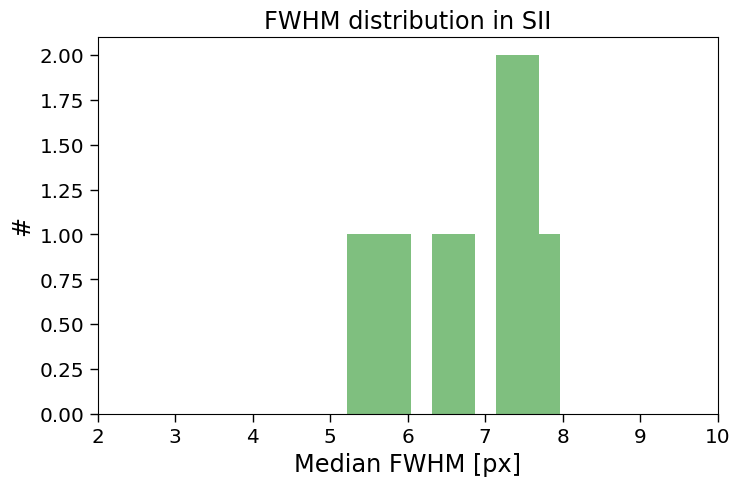

In [23]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution in SII')
ax.hist(psf_vals, bins=10, alpha=0.5, color='green')

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('Median FWHM [px]')
ax.set_ylabel('#')
plt.show()

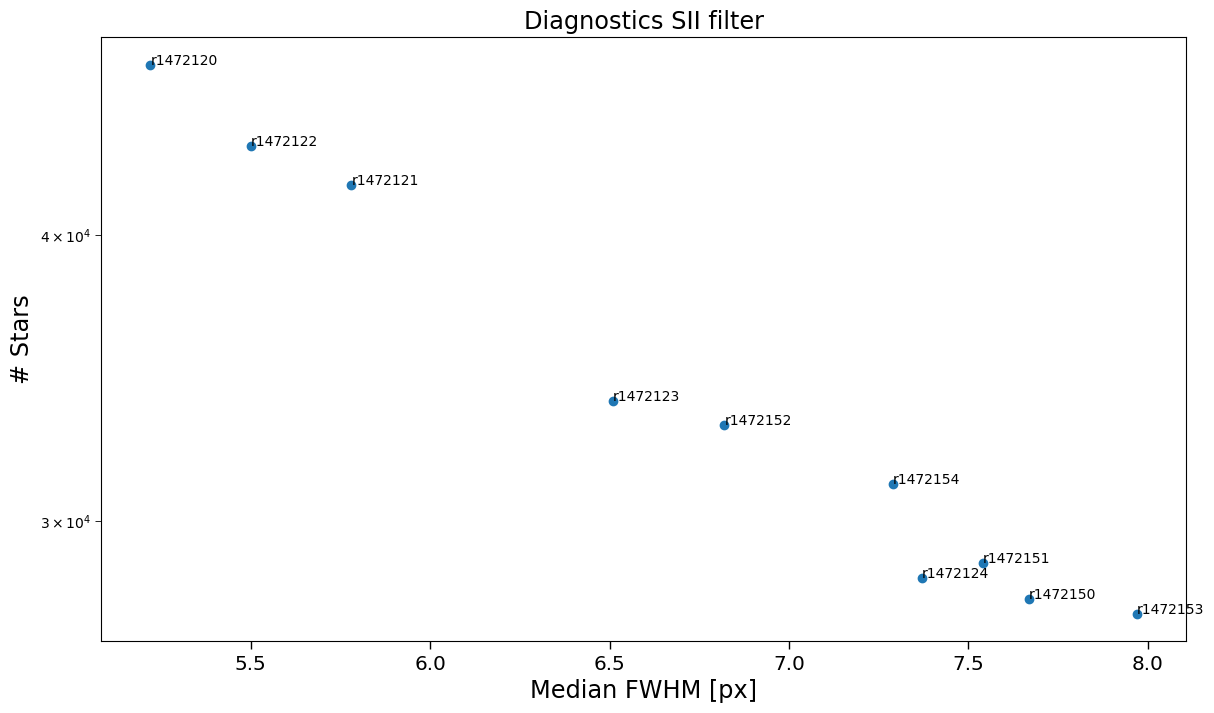

In [24]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics SII filter')
ax.scatter(psf_vals, number_of_stars)
# ax.set_xlim(2,8)
# ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

# Hb

In [25]:
work_dir = 'g7/hb/sextractor/'
names_sex = sorted(glob.glob(int_dropbox_path + work_dir + '*dat'))
print(names_sex)

['/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/hb/sextractor/r1472125sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/hb/sextractor/r1472126sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/hb/sextractor/r1472127sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/hb/sextractor/r1472128sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/hb/sextractor/r1472129sex.dat']


In [26]:
psf_vals, number_of_stars, split_names = np.array([]), np.array([]), np.array([])

for file in names_sex:
    data = np.loadtxt(file)
    split_names = np.append(split_names, file.split('/')[-1][:-7])
    psf_vals = np.append(psf_vals, np.median(data[:,14]))
    number_of_stars = np.append(number_of_stars, len(data[:,14]))
#     median_vals.append(np.median(data[:,14]))
print('PSF', psf_vals)
print(np.median(psf_vals), np.std(psf_vals))
print('Number of Stars', number_of_stars)
print(split_names)

PSF [7.35 6.4  6.54 6.39 6.01]
6.4 0.44251101681201105
Number of Stars [14044. 17582. 17238. 17732. 18953.]
['r1472125' 'r1472126' 'r1472127' 'r1472128' 'r1472129']


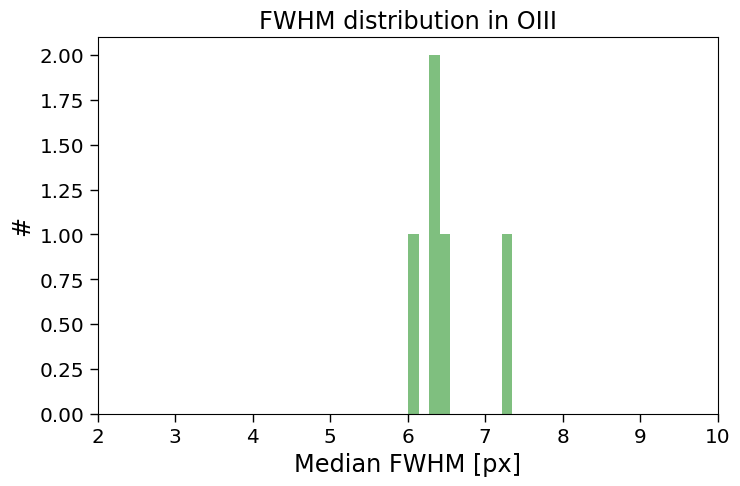

In [27]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution in OIII')
ax.hist(psf_vals, bins=10, alpha=0.5, color='green')

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('Median FWHM [px]')
ax.set_ylabel('#')
plt.show()

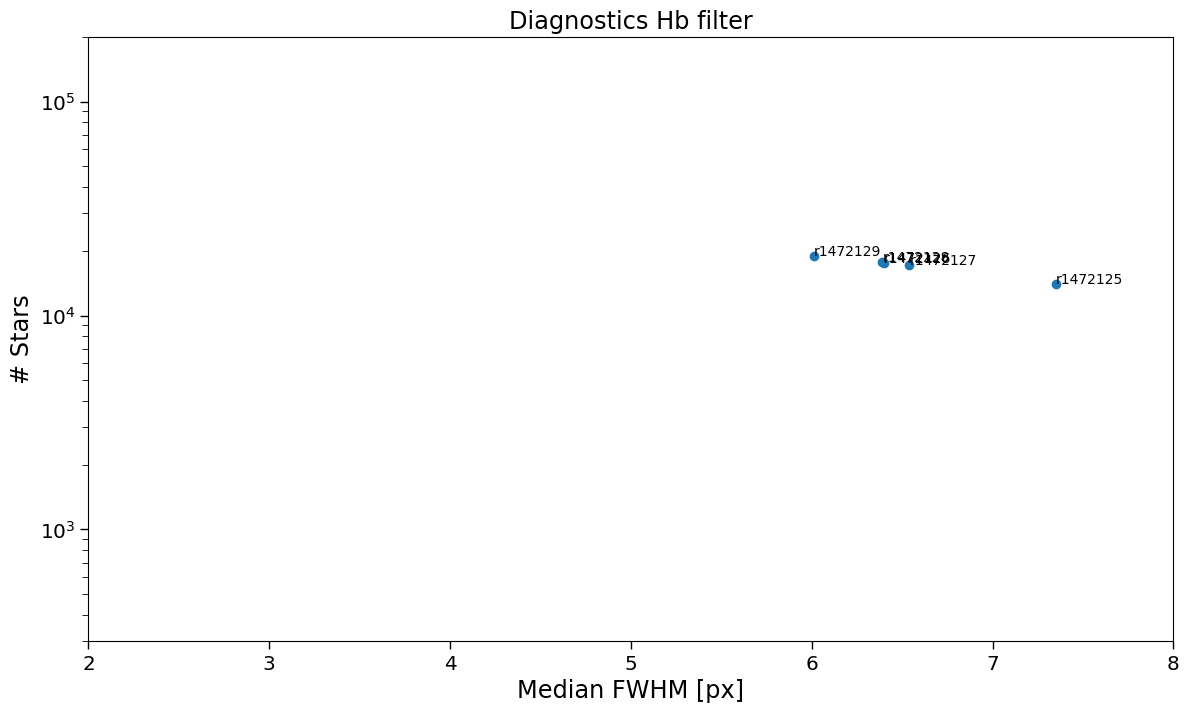

In [28]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics Hb filter')
ax.scatter(psf_vals, number_of_stars)
ax.set_xlim(2,8)
ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

## OIII filter

In [29]:
# work_dir = '/media/vdomcek/Storage/work/2019_INT_La_Palma/all/science_o3/ORIGINALS/sextractor/'
work_dir = 'g7/o3/sextractor/'
names_sex = sorted(glob.glob(int_dropbox_path+work_dir + '*dat'))
print(names_sex)

['/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1471533sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1471534sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1471535sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1471536sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1471537sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1472115sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1472116sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1472117sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1472118sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/g7/o3/sextractor/r1472119sex.dat', '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/

In [31]:
psf_vals, number_of_stars, split_names = np.array([]), np.array([]), np.array([])

for file in names_sex:
    data = np.loadtxt(file)
    split_names = np.append(split_names, file.split('/')[-1][:-7])
    psf_vals = np.append(psf_vals, np.median(data[:,14]))
    number_of_stars = np.append(number_of_stars, len(data[:,14]))
#     median_vals.append(np.median(data[:,14]))
print('PSF', psf_vals)
print(np.median(psf_vals), np.std(psf_vals))
print('Number of Stars', number_of_stars)
print(split_names)

PSF [7.22 7.1  6.94 6.6  6.88 6.16 6.01 5.94 5.43 5.75 6.09 5.73 6.95 6.17]
6.165 0.559409765479908
Number of Stars [25324. 24411. 24881. 26530. 25679. 31213. 32602. 33286. 40104. 35795.
 30313. 32089. 24277. 29158.]
['r1471533' 'r1471534' 'r1471535' 'r1471536' 'r1471537' 'r1472115'
 'r1472116' 'r1472117' 'r1472118' 'r1472119' 'r1472160' 'r1472161'
 'r1472162' 'r1472163']


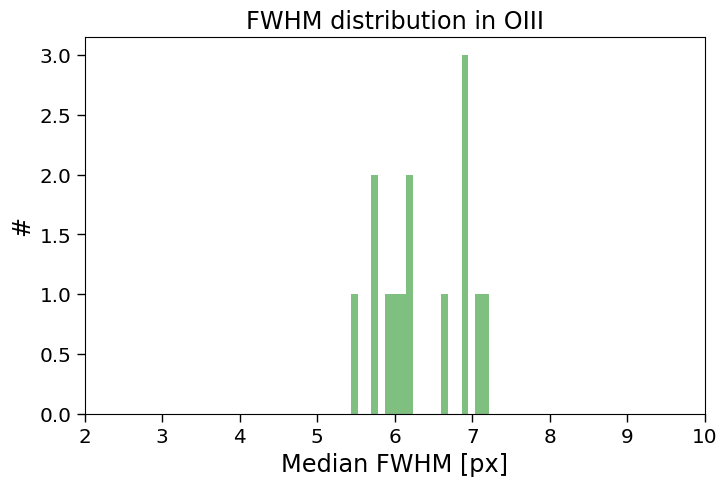

In [32]:
bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution in OIII')
ax.hist(psf_vals, bins=20, alpha=0.5, color='green')

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('Median FWHM [px]')
ax.set_ylabel('#')
plt.show()

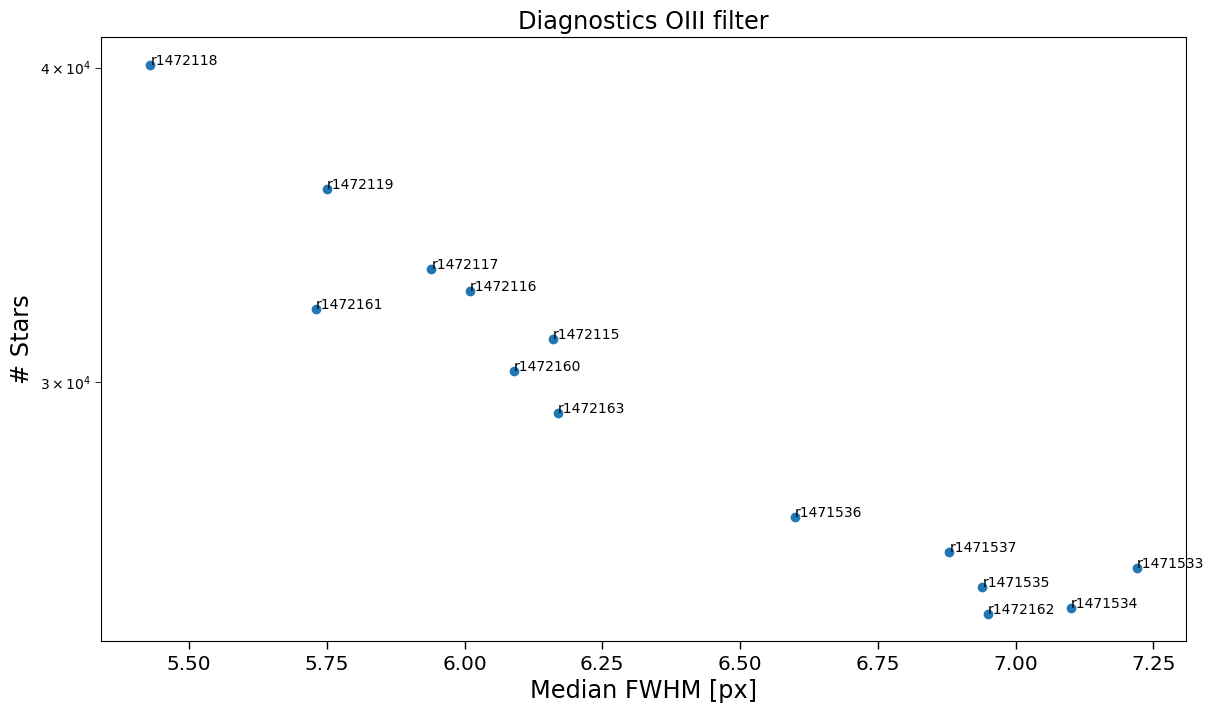

In [33]:
# bins = [2. + 0.1*i for i in range(50)]
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('Diagnostics OIII filter')
ax.scatter(psf_vals, number_of_stars)
# ax.set_xlim(2,8)
# ax.set_ylim(3e2,2e5)
ax.set_ylabel('# Stars')
ax.set_xlabel('Median FWHM [px]')
plt.yscale('log')
for i, txt in enumerate(split_names):
    ax.annotate(txt, (psf_vals[i], number_of_stars[i]))
plt.show()

# AIRMASS

In [34]:
obs_days = glob.glob('/mnt/storage/work/2019_INT_La_Palma/raw_data/*')
obs_files = (glob.glob('/mnt/storage/work/2019_INT_La_Palma/raw_data/*/*.fit'))

In [35]:
airmass = np.array([])
mjd = np.array([])

obs_days = glob.glob('/mnt/storage/work/2019_INT_La_Palma/raw_data/*')
for day in obs_days:
    obs_files = (glob.glob(day+'/*.fit'))
    for obs in obs_files:
#         print(obs)
        hdu = fits.open(obs)
        mjd = np.append(mjd, hdu[0].header['MJD-OBS'])
        airmass = np.append(airmass, hdu[0].header['AIRMASS'])
        hdu.close()

Text(0, 0.5, 'AIRMASS')

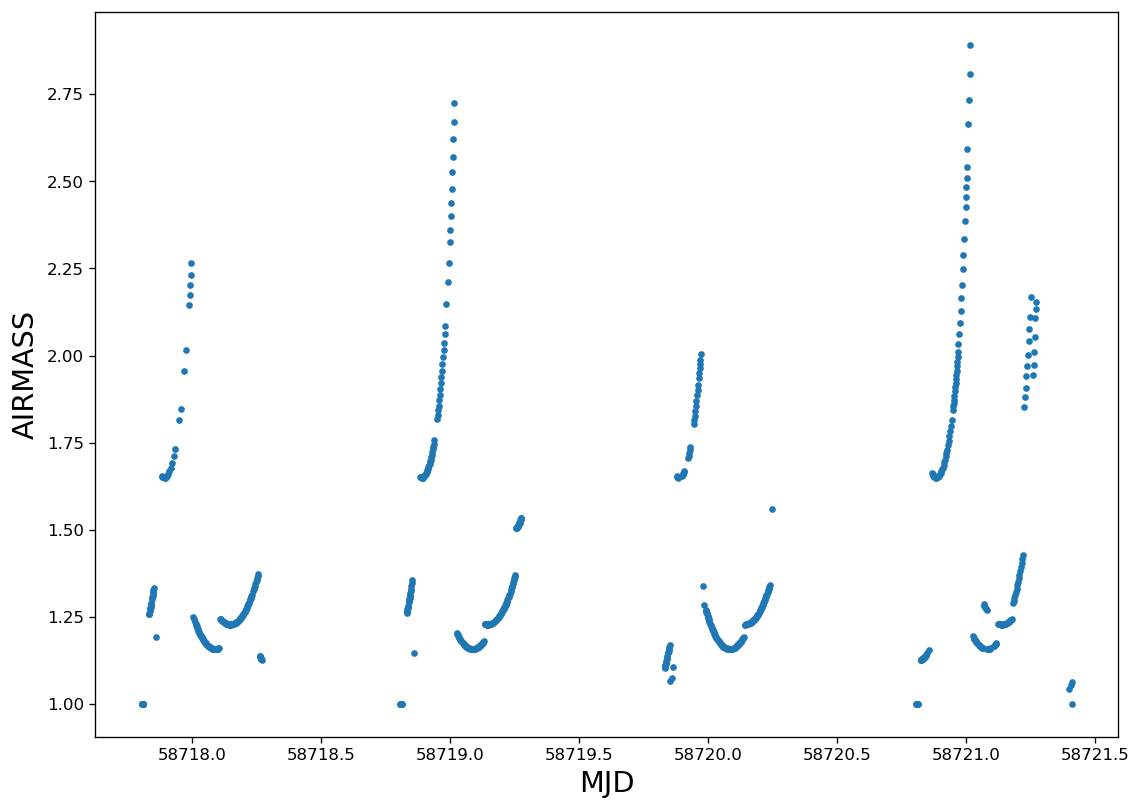

In [36]:
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)

fig = plt.figure(figsize=(11,8), dpi=120)
plt.plot(mjd, airmass, '.')
plt.xlabel('MJD')
plt.ylabel('AIRMASS')

In [37]:
obs_ha = glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_ha/ORIGINALS/*fit')
obs_hb = glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_hb/ORIGINALS/*fit')
obs_o3 = glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_o3/ORIGINALS/*fit')
obs_s2 = glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_s2/ORIGINALS/*fit')
obs_r = glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_r/ORIGINALS/*fit')
obs_g = glob.glob('/mnt/storage/work/2019_INT_La_Palma/all/science_g/ORIGINALS/*fit')

In [38]:
mjd_ha = np.array([])
airmass_ha = np.array([])

for obs in obs_ha:
    hdu = fits.open(obs)
    mjd_ha = np.append(mjd_ha, hdu[0].header['MJD-OBS'])
    airmass_ha = np.append(airmass_ha, hdu[0].header['AIRMASS'])
    hdu.close()

In [39]:
mjd_hb = np.array([])
airmass_hb = np.array([])

for obs in obs_hb:
    hdu = fits.open(obs)
    mjd_hb = np.append(mjd_hb, hdu[0].header['MJD-OBS'])
    airmass_hb = np.append(airmass_hb, hdu[0].header['AIRMASS'])
    hdu.close()

In [40]:
mjd_r = np.array([])
airmass_r = np.array([])

for obs in obs_r:
    hdu = fits.open(obs)
    mjd_r = np.append(mjd_r, hdu[0].header['MJD-OBS'])
    airmass_r = np.append(airmass_r, hdu[0].header['AIRMASS'])
    hdu.close()

In [41]:
mjd_g = np.array([])
airmass_g = np.array([])

for obs in obs_g:
    hdu = fits.open(obs)
    mjd_g = np.append(mjd_g, hdu[0].header['MJD-OBS'])
    airmass_g = np.append(airmass_g, hdu[0].header['AIRMASS'])
    hdu.close()

In [42]:
mjd_o3 = np.array([])
airmass_o3 = np.array([])

for obs in obs_o3:
    hdu = fits.open(obs)
    mjd_o3 = np.append(mjd_o3, hdu[0].header['MJD-OBS'])
    airmass_o3 = np.append(airmass_o3, hdu[0].header['AIRMASS'])
    hdu.close()

In [43]:
mjd_s2 = np.array([])
airmass_s2 = np.array([])

for obs in obs_s2:
    hdu = fits.open(obs)
    mjd_s2 = np.append(mjd_s2, hdu[0].header['MJD-OBS'])
    airmass_s2 = np.append(airmass_s2, hdu[0].header['AIRMASS'])
    hdu.close()

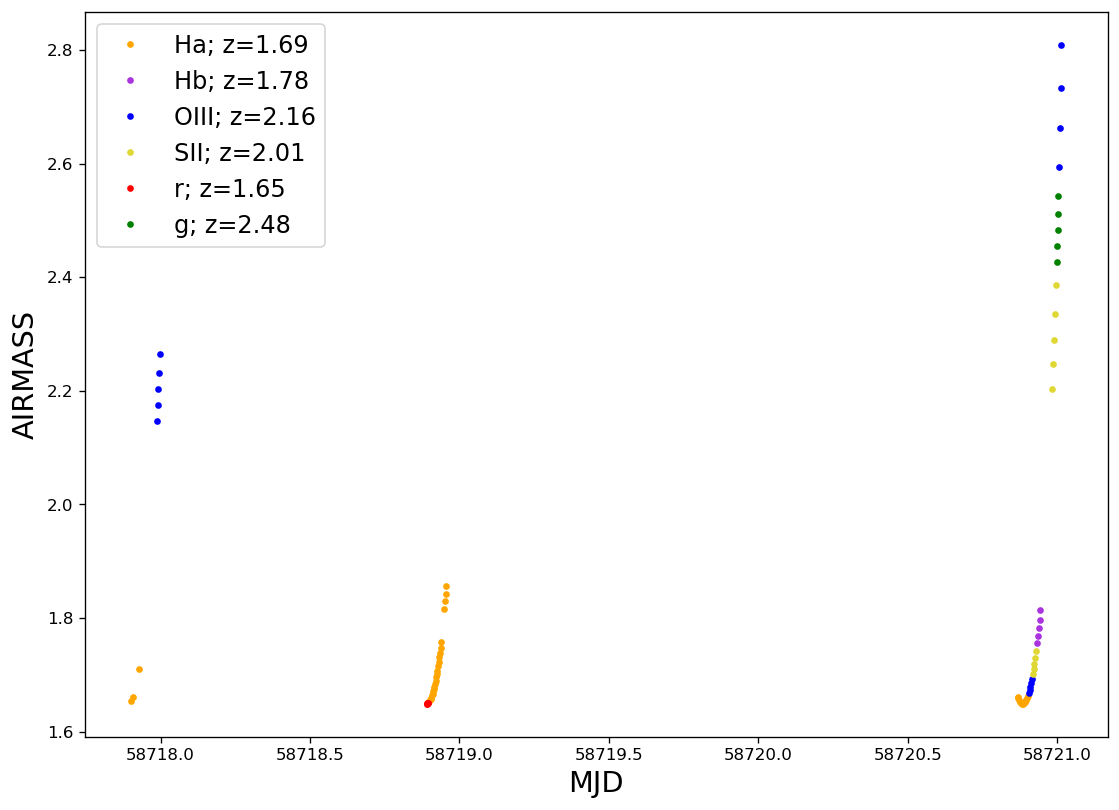

In [44]:
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)

fig = plt.figure(figsize=(11,8), dpi=120)
plt.plot(mjd_ha, airmass_ha, '.', color='orange', label='Ha; z='+str( np.round(np.mean(airmass_ha) ,2) ))
plt.plot(mjd_hb, airmass_hb, '.', color='#A934DF', label='Hb; z='+str(np.round(np.mean(airmass_hb),2)))
plt.plot(mjd_o3, airmass_o3, '.', color='blue', label='OIII; z='+str(np.round(np.mean(airmass_o3),2)))
plt.plot(mjd_s2, airmass_s2, '.', color='#DFD734', label='SII; z='+str(np.round(np.mean(airmass_s2),2)))
plt.plot(mjd_r, airmass_r, '.', color='red', label='r; z='+str(np.round(np.mean(airmass_r),2)))
plt.plot(mjd_g, airmass_g, '.', color='green', label='g; z='+str(np.round(np.mean(airmass_g),2)))

plt.xlabel('MJD')
plt.ylabel('AIRMASS')
plt.legend()

In [45]:
from scipy.ndimage import gaussian_filter

# Setup Ha + r

In [46]:
work_dir = 'g7/analysis/fm/'
filter1 = 'r_5m_fm'
filter2 = 'ha_90m_fm'

## Sextractor

In [47]:
print('sextractor ../'+filter1+'.fits -c default.sex -CATALOG_NAME ../'+filter1+'_sx.dat')
print('sextractor ../'+filter2+'.fits -c default.sex -CATALOG_NAME ../'+filter2+'_sx.dat')

sextractor ../r_5m_fm.fits -c default.sex -CATALOG_NAME ../r_5m_fm_sx.dat
sextractor ../ha_90m_fm.fits -c default.sex -CATALOG_NAME ../ha_90m_fm_sx.dat


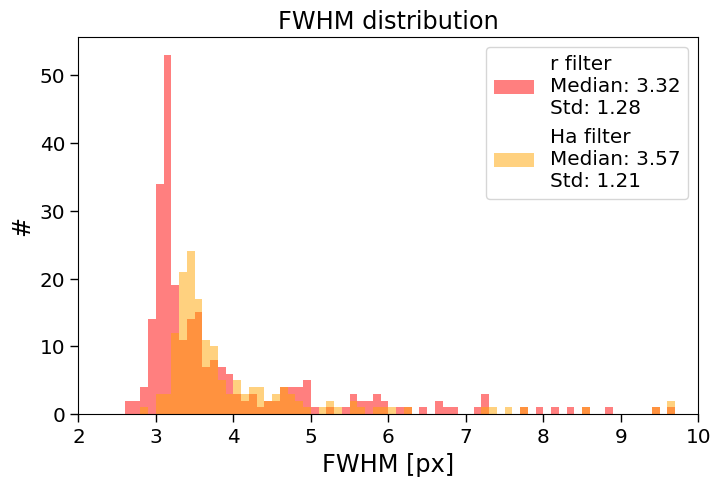

In [48]:
r_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
ha_sex_file = int_dropbox_path + work_dir+ filter2+'_sx.dat'

sex_data_r = np.loadtxt(r_sex_file)
sex_data_ha = np.loadtxt(ha_sex_file)


bins2= [0+0.1*i for i in range(100)]
# ss = sex_data_r[:,6] < 1e9
# pp = sex_data_ha[:,6] < 1e9  
       
ss = ((sex_data_r[:,6] > 1300) & (sex_data_r[:,6] < 1500)) & ((sex_data_r[:,5] > 2900) & (sex_data_r[:,5] < 3200))
pp = ((sex_data_ha[:,6] > 1300) & (sex_data_ha[:,6] < 1500)) & ((sex_data_ha[:,5] > 2900) & (sex_data_ha[:,5] < 3200))


fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_r[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label='r filter \nMedian: ' + str(np.round(np.median(sex_data_r[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_r[:,14][ss]),2)))
plt.hist(sex_data_ha[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label='Ha filter \nMedian: ' + str(np.round(np.median(sex_data_ha[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_ha[:,14][pp]),2)))
ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

In [49]:
fits_hdr_r = fits.open(int_dropbox_path + work_dir + filter1+'.fits')[0]
fits_hdr_ha = fits.open(int_dropbox_path + work_dir+ filter2+'.fits')[0]

fits_data_r = fits_hdr_r.data
fits_data_ha = fits_hdr_ha.data

sigma_val = 0.54 # <----------------------------------------------------- CHANGE HERE <---
sigma_val_str = str(sigma_val).replace('.','')
result = gaussian_filter(fits_data_r, sigma=sigma_val)

new_header = fits_hdr_r.header
new_header['history'] = '--------------------------------------------------'
new_header['history'] = 'Used script:    int_subtraction_development.ipynb'
new_header['history'] = 'Author:         Vladimir Domcek'
new_header['history'] = 'Date and time:  ' + time.strftime('%X %x %Z')
new_header['history'] = 'Main changes: '
new_header['history'] = 'Smoothing image to match narrow filter '
new_header['history'] = 'Used function gaussian_filter with parameter sigma='+str(sigma_val)
# new_header

fits_hdr_r.data = result
fits_hdr_r.header = new_header
fits_hdr_r.writeto(int_dropbox_path + work_dir + filter1+'_sm'+sigma_val_str+'.fits', overwrite=True)
print('sextractor ../'+filter1+'_sm'+sigma_val_str+'.fits -c default.sex -CATALOG_NAME ../'+filter1+'_sm'+sigma_val_str+'_sx.dat')

sextractor ../r_5m_fm_sm054.fits -c default.sex -CATALOG_NAME ../r_5m_fm_sm054_sx.dat


### Input above command into sextractor

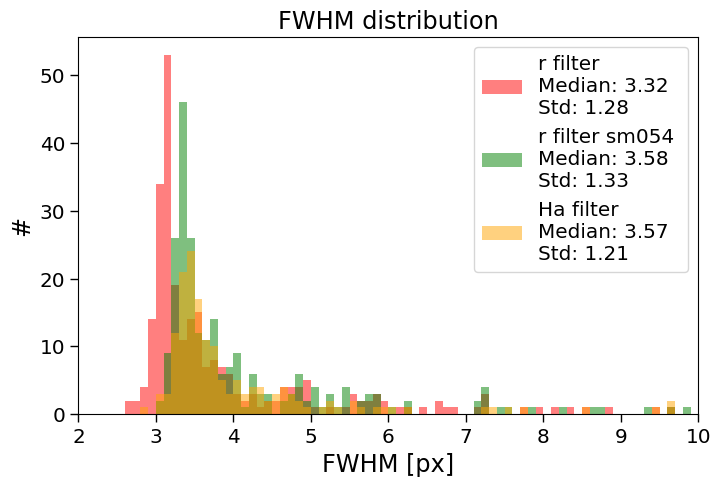

In [50]:
smoothing = True

r_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
if smoothing == True: r_sex_file_smo = int_dropbox_path + work_dir + filter1+'_sm'+sigma_val_str+'_sx.dat'
ha_sex_file = int_dropbox_path + work_dir+ filter2+'_sx.dat'

sex_data_r = np.loadtxt(r_sex_file)
if smoothing == True: sex_data_r_smo = np.loadtxt(r_sex_file_smo)
sex_data_ha = np.loadtxt(ha_sex_file)


bins2= [0+0.1*i for i in range(100)]
# ss = sex_data_r[:,6] < 1e9
# if smoothing == True: tt = sex_data_r_smo[:,6] < 1e9
# pp = sex_data_ha[:,6] < 1e9  
       
# 1300:1500,2900:3200
ss = ((sex_data_r[:,6] > 1300) & (sex_data_r[:,6] < 1500)) & ((sex_data_r[:,5] > 2900) & (sex_data_r[:,5] < 3200))
if smoothing == True: tt = ((sex_data_r_smo[:,6] > 1300) & (sex_data_r_smo[:,6] < 1500)) & ((sex_data_r_smo[:,5] > 2900) & (sex_data_r_smo[:,5] < 3200))
pp = ((sex_data_ha[:,6] > 1300) & (sex_data_ha[:,6] < 1500)) & ((sex_data_ha[:,5] > 2900) & (sex_data_ha[:,5] < 3200))


fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_r[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label='r filter \nMedian: ' + str(np.round(np.median(sex_data_r[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_r[:,14][ss]),2)))

if smoothing == True: plt.hist(sex_data_r_smo[:,14][tt], bins=bins2, alpha=0.5, color='green',
         label='r filter sm'+sigma_val_str+' \nMedian: ' + str(np.round(np.median(sex_data_r_smo[:,14][tt]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_r_smo[:,14][tt]),2)))

plt.hist(sex_data_ha[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label='Ha filter \nMedian: ' + str(np.round(np.median(sex_data_ha[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_ha[:,14][pp]),2)))
ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

## Objective is to match green and yellow reasonably close

# Setup OIII + g

In [51]:
work_dir = 'g7/analysis/fm/'
filter1 = 'g_5m_fm'
filter2 = 'o3_37m_fm'

## Sextractor

In [52]:
print('sextractor ../'+filter1+'.fits -c default.sex -CATALOG_NAME ../'+filter1+'_sx.dat')
print('sextractor ../'+filter2+'.fits -c default.sex -CATALOG_NAME ../'+filter2+'_sx.dat')

sextractor ../g_5m_fm.fits -c default.sex -CATALOG_NAME ../g_5m_fm_sx.dat
sextractor ../o3_37m_fm.fits -c default.sex -CATALOG_NAME ../o3_37m_fm_sx.dat


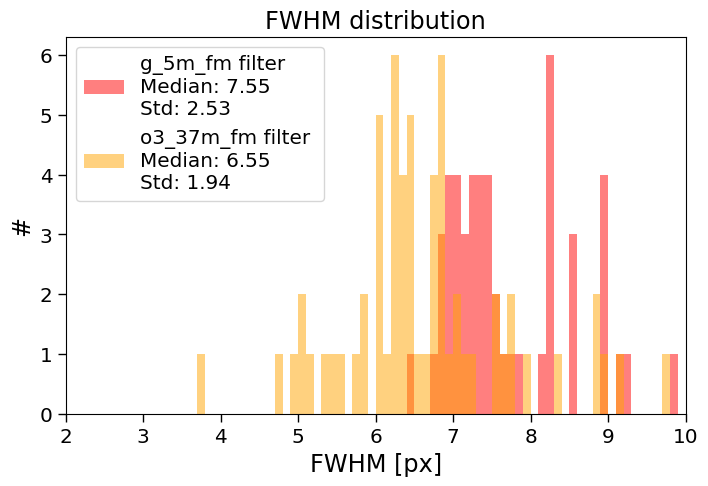

In [53]:
filter1_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
filter2_sex_file = int_dropbox_path + work_dir + filter2+'_sx.dat'

sex_data_filter1 = np.loadtxt(filter1_sex_file)
sex_data_filter2 = np.loadtxt(filter2_sex_file)


bins2= [0+0.1*i for i in range(100)]
# ss = sex_data_r[:,6] < 1e9
# pp = sex_data_ha[:,6] < 1e9  
       
ss = ((sex_data_filter1[:,6] > 1300) & (sex_data_filter1[:,6] < 1500)) & ((sex_data_filter1[:,5] > 2900) & (sex_data_filter1[:,5] < 3200))
pp = ((sex_data_filter2[:,6] > 1300) & (sex_data_filter2[:,6] < 1500)) & ((sex_data_filter2[:,5] > 2900) & (sex_data_filter2[:,5] < 3200))


fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_filter1[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label=filter1+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter1[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter1[:,14][ss]),2)))
plt.hist(sex_data_filter2[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label=filter2+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter2[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter2[:,14][pp]),2)))
ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

# Smoothing

In [54]:
fits_hdr_filter1 = fits.open(int_dropbox_path + work_dir + filter1+'.fits')[0]
fits_hdr_filter2 = fits.open(int_dropbox_path + work_dir+ filter2+'.fits')[0]

fits_data_filter1 = fits_hdr_filter1.data
fits_data_filter2 = fits_hdr_filter2.data

sigma_val = 1.39
sigma_val_str = str(sigma_val).replace('.','')
print('Smooting '+filter2+' with sigma '+sigma_val_str)
result = gaussian_filter(fits_data_filter2, sigma=sigma_val)

new_header = fits_hdr_filter2.header
new_header['history'] = '--------------------------------------------------'
new_header['history'] = 'Used script:    int_subtraction_development.ipynb'
new_header['history'] = 'Author:         Vladimir Domcek'
# new_header['history'] = 'Date and time:  ' + time.strftime('%X %x %Z')
new_header['history'] = 'Main changes: '
new_header['history'] = 'Smoothing image to match continuum filter '
new_header['history'] = 'Used function gaussian_filter with parameter sigma='+str(sigma_val)
# new_header

fits_hdr_filter2.data = result
fits_hdr_filter2.header = new_header
fits_hdr_filter2.writeto(int_dropbox_path + work_dir + filter2+'_sm'+sigma_val_str+'.fits', overwrite=True)
print('sextractor ../'+filter2+'_sm'+sigma_val_str+'.fits -c default.sex -CATALOG_NAME ../'+filter2+'_sm'+sigma_val_str+'_sx.dat')

Smooting o3_37m_fm with sigma 139
sextractor ../o3_37m_fm_sm139.fits -c default.sex -CATALOG_NAME ../o3_37m_fm_sm139_sx.dat


### Input above command into sextractor

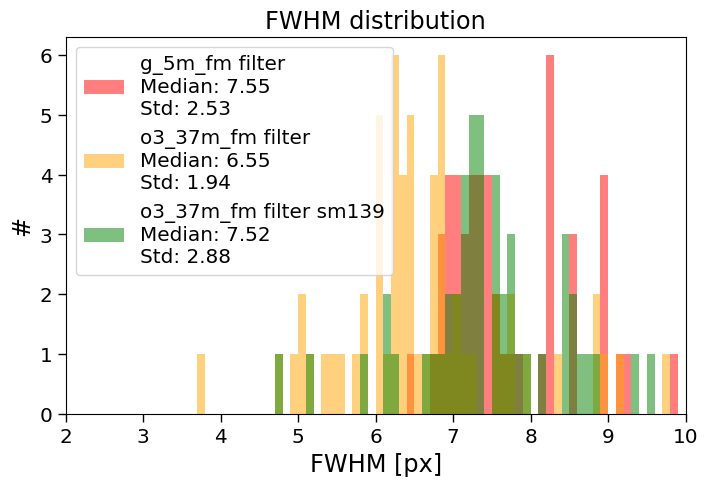

In [55]:
filter1_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
filter2_sex_file = int_dropbox_path + work_dir+ filter2+'_sx.dat'
filter2_sex_file_smo = int_dropbox_path + work_dir + filter2+'_sm'+sigma_val_str+'_sx.dat'

sex_data_filter1 = np.loadtxt(filter1_sex_file)
sex_data_filter2 = np.loadtxt(filter2_sex_file)
sex_data_filter2_smo = np.loadtxt(filter2_sex_file_smo)

bins2= [0+0.1*i for i in range(100)]
ss = ((sex_data_filter1[:,6] > 1300) & (sex_data_filter1[:,6] < 1500)) & ((sex_data_filter1[:,5] > 2900) & (sex_data_filter1[:,5] < 3200))
pp = ((sex_data_filter2[:,6] > 1300) & (sex_data_filter2[:,6] < 1500)) & ((sex_data_filter2[:,5] > 2900) & (sex_data_filter2[:,5] < 3200))
tt = ((sex_data_filter2_smo[:,6] > 1300) & (sex_data_filter2_smo[:,6] < 1500)) & ((sex_data_filter2_smo[:,5] > 2900) & (sex_data_filter2_smo[:,5] < 3200))

# ss = sex_data_filter1[:,6] < 1e9
# pp = sex_data_filter2[:,6] < 1e9  
# tt = sex_data_filter2_smo[:,6] < 1e9

fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_filter1[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label=filter1+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter1[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter1[:,14][ss]),2)))
plt.hist(sex_data_filter2[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label=filter2+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter2[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter2[:,14][pp]),2)))

plt.hist(sex_data_filter2_smo[:,14][tt], bins=bins2, alpha=0.5, color='green',
         label=filter2+' filter sm'+sigma_val_str+'\nMedian: ' + str(np.round(np.median(sex_data_filter2_smo[:,14][tt]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter2_smo[:,14][tt]),2)))

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

## Objective is to match green and red reasonably close

# Setup SII + r

In [56]:
work_dir = 'g7/analysis/fm/'
filter1 = 'r_5m_fm'
filter2 = 's2_30m_fm'

## Sextractor

In [57]:
print('sextractor ../'+filter1+'.fits -c default.sex -CATALOG_NAME ../'+filter1+'_sx.dat')
print('sextractor ../'+filter2+'.fits -c default.sex -CATALOG_NAME ../'+filter2+'_sx.dat')

sextractor ../r_5m_fm.fits -c default.sex -CATALOG_NAME ../r_5m_fm_sx.dat
sextractor ../s2_30m_fm.fits -c default.sex -CATALOG_NAME ../s2_30m_fm_sx.dat


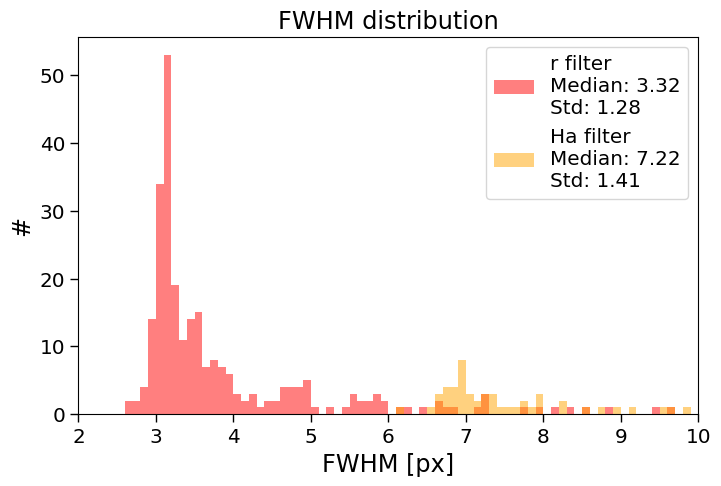

In [58]:
r_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
ha_sex_file = int_dropbox_path + work_dir+ filter2+'_sx.dat'

sex_data_r = np.loadtxt(r_sex_file)
sex_data_s2 = np.loadtxt(ha_sex_file)


bins2= [0+0.1*i for i in range(100)]
# ss = sex_data_r[:,6] < 1e9
# pp = sex_data_s2[:,6] < 1e9  
       
ss = ((sex_data_r[:,6] > 1300) & (sex_data_r[:,6] < 1500)) & ((sex_data_r[:,5] > 2900) & (sex_data_r[:,5] < 3200))
pp = ((sex_data_s2[:,6] > 1300) & (sex_data_s2[:,6] < 1500)) & ((sex_data_s2[:,5] > 2900) & (sex_data_s2[:,5] < 3200))


fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_r[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label='r filter \nMedian: ' + str(np.round(np.median(sex_data_r[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_r[:,14][ss]),2)))
plt.hist(sex_data_s2[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label='Ha filter \nMedian: ' + str(np.round(np.median(sex_data_s2[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_s2[:,14][pp]),2)))
ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

# Smoothing

In [59]:
fits_hdr_r = fits.open(int_dropbox_path + work_dir + filter1+'.fits')[0]
fits_hdr_s2 = fits.open(int_dropbox_path + work_dir+ filter2+'.fits')[0]

fits_data_r = fits_hdr_r.data
fits_data_s2 = fits_hdr_s2.data

sigma_val = 2.50
sigma_val_str = str(sigma_val).replace('.','')
result = gaussian_filter(fits_data_r, sigma=sigma_val)

new_header = fits_hdr_r.header
new_header['history'] = '--------------------------------------------------'
new_header['history'] = 'Used script:    int_subtraction_development.ipynb'
new_header['history'] = 'Author:         Vladimir Domcek'
new_header['history'] = 'Date and time:  ' + time.strftime('%X %x %Z')
new_header['history'] = 'Main changes: '
new_header['history'] = 'Smoothing image to match narrow filter '
new_header['history'] = 'Used function gaussian_filter with parameter sigma='+str(sigma_val)
# new_header

fits_hdr_r.data = result
fits_hdr_r.header = new_header
fits_hdr_r.writeto(int_dropbox_path + work_dir + filter1+'_sm'+sigma_val_str+'.fits', overwrite=True)
print('sextractor ../'+filter1+'_sm'+sigma_val_str+'.fits -c default.sex -CATALOG_NAME ../'+filter1+'_sm'+sigma_val_str+'_sx.dat')

sextractor ../r_5m_fm_sm25.fits -c default.sex -CATALOG_NAME ../r_5m_fm_sm25_sx.dat


### Input above command into sextractor

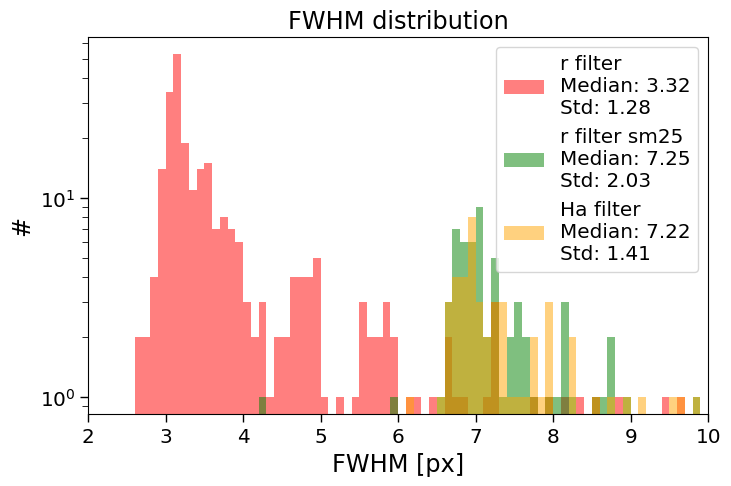

In [60]:
smoothing = True

r_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
if smoothing == True: r_sex_file_smo = int_dropbox_path + work_dir + filter1+'_sm'+sigma_val_str+'_sx.dat'
ha_sex_file = int_dropbox_path + work_dir+ filter2+'_sx.dat'

sex_data_r = np.loadtxt(r_sex_file)
if smoothing == True: sex_data_r_smo = np.loadtxt(r_sex_file_smo)
sex_data_s2 = np.loadtxt(ha_sex_file)


bins2= [0+0.1*i for i in range(100)]
ss = sex_data_r[:,6] < 1e9
if smoothing == True: tt = sex_data_r_smo[:,6] < 1e9
pp = sex_data_s2[:,6] < 1e9  
       
# 1300:1500,2900:3200
ss = ((sex_data_r[:,6] > 1300) & (sex_data_r[:,6] < 1500)) & ((sex_data_r[:,5] > 2900) & (sex_data_r[:,5] < 3200))
if smoothing == True: tt = ((sex_data_r_smo[:,6] > 1300) & (sex_data_r_smo[:,6] < 1500)) & ((sex_data_r_smo[:,5] > 2900) & (sex_data_r_smo[:,5] < 3200))
pp = ((sex_data_s2[:,6] > 1300) & (sex_data_s2[:,6] < 1500)) & ((sex_data_s2[:,5] > 2900) & (sex_data_s2[:,5] < 3200))


fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_r[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label='r filter \nMedian: ' + str(np.round(np.median(sex_data_r[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_r[:,14][ss]),2)))

if smoothing == True: plt.hist(sex_data_r_smo[:,14][tt], bins=bins2, alpha=0.5, color='green',
         label='r filter sm'+sigma_val_str+' \nMedian: ' + str(np.round(np.median(sex_data_r_smo[:,14][tt]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_r_smo[:,14][tt]),2)))

plt.hist(sex_data_s2[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label='Ha filter \nMedian: ' + str(np.round(np.median(sex_data_s2[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_s2[:,14][pp]),2)))
ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.yscale('log')
plt.show()
plt.close()

## Objective is to match green and yellow reasonably close

# Setup Hb + g

In [61]:
work_dir = 'g7/analysis/fm/'
filter1 = 'g_5m_fm'
filter2 = 'hb_15m_fm'

## Sextractor

In [62]:
print('sextractor ../'+filter1+'.fits -c default.sex -CATALOG_NAME ../'+filter1+'_sx.dat')
print('sextractor ../'+filter2+'.fits -c default.sex -CATALOG_NAME ../'+filter2+'_sx.dat')

sextractor ../g_5m_fm.fits -c default.sex -CATALOG_NAME ../g_5m_fm_sx.dat
sextractor ../hb_15m_fm.fits -c default.sex -CATALOG_NAME ../hb_15m_fm_sx.dat


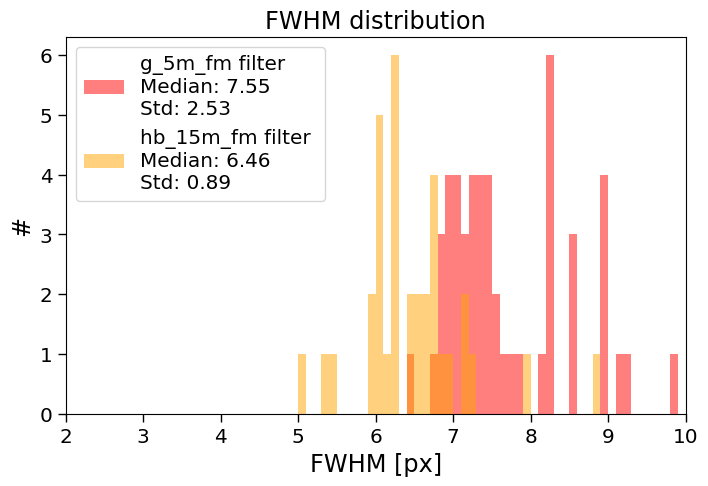

In [63]:
filter1_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
filter2_sex_file = int_dropbox_path + work_dir + filter2+'_sx.dat'

sex_data_filter1 = np.loadtxt(filter1_sex_file)
sex_data_filter2 = np.loadtxt(filter2_sex_file)


bins2= [0+0.1*i for i in range(100)]
# ss = sex_data_r[:,6] < 1e9
# pp = sex_data_ha[:,6] < 1e9  
       
ss = ((sex_data_filter1[:,6] > 1300) & (sex_data_filter1[:,6] < 1500)) & ((sex_data_filter1[:,5] > 2900) & (sex_data_filter1[:,5] < 3200))
pp = ((sex_data_filter2[:,6] > 1300) & (sex_data_filter2[:,6] < 1500)) & ((sex_data_filter2[:,5] > 2900) & (sex_data_filter2[:,5] < 3200))


fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_filter1[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label=filter1+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter1[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter1[:,14][ss]),2)))
plt.hist(sex_data_filter2[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label=filter2+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter2[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter2[:,14][pp]),2)))
ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

# Smoothing

In [64]:
fits_hdr_filter1 = fits.open(int_dropbox_path + work_dir + filter1+'.fits')[0]
fits_hdr_filter2 = fits.open(int_dropbox_path + work_dir + filter2+'.fits')[0]

fits_data_filter1 = fits_hdr_filter1.data
fits_data_filter2 = fits_hdr_filter2.data

sigma_val = 1.37
sigma_val_str = str(sigma_val).replace('.','')
print('Smooting '+filter2+' with sigma '+sigma_val_str)
result = gaussian_filter(fits_data_filter2, sigma=sigma_val)

new_header = fits_hdr_filter2.header
new_header['history'] = '--------------------------------------------------'
new_header['history'] = 'Used script:    int_subtraction_development.ipynb'
new_header['history'] = 'Author:         Vladimir Domcek'
new_header['history'] = 'Date and time:  ' + time.strftime('%X %x %Z')
new_header['history'] = 'Main changes: '
new_header['history'] = 'Smoothing image to match continuum filter '
new_header['history'] = 'Used function gaussian_filter with parameter sigma='+str(sigma_val)
# new_header

fits_hdr_filter2.data = result
fits_hdr_filter2.header = new_header
fits_hdr_filter2.writeto(int_dropbox_path + work_dir + filter2+'_sm'+sigma_val_str+'.fits', overwrite=True)
print('sextractor ../'+filter2+'_sm'+sigma_val_str+'.fits -c default.sex -CATALOG_NAME ../'+filter2+'_sm'+sigma_val_str+'_sx.dat')

Smooting hb_15m_fm with sigma 137
sextractor ../hb_15m_fm_sm137.fits -c default.sex -CATALOG_NAME ../hb_15m_fm_sm137_sx.dat


### Input above command into sextractor

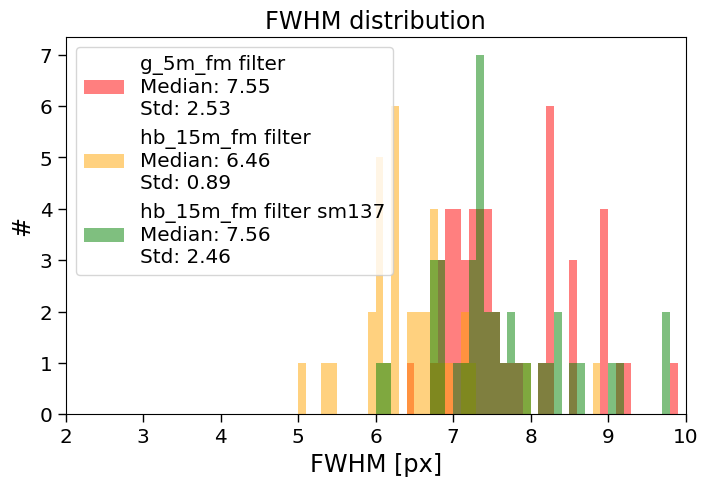

In [65]:
filter1_sex_file = int_dropbox_path + work_dir + filter1+'_sx.dat'
filter2_sex_file = int_dropbox_path + work_dir+ filter2+'_sx.dat'
filter2_sex_file_smo = int_dropbox_path + work_dir + filter2+'_sm'+sigma_val_str+'_sx.dat'

sex_data_filter1 = np.loadtxt(filter1_sex_file)
sex_data_filter2 = np.loadtxt(filter2_sex_file)
sex_data_filter2_smo = np.loadtxt(filter2_sex_file_smo)

bins2= [0+0.1*i for i in range(100)]
ss = ((sex_data_filter1[:,6] > 1300) & (sex_data_filter1[:,6] < 1500)) & ((sex_data_filter1[:,5] > 2900) & (sex_data_filter1[:,5] < 3200))
pp = ((sex_data_filter2[:,6] > 1300) & (sex_data_filter2[:,6] < 1500)) & ((sex_data_filter2[:,5] > 2900) & (sex_data_filter2[:,5] < 3200))
tt = ((sex_data_filter2_smo[:,6] > 1300) & (sex_data_filter2_smo[:,6] < 1500)) & ((sex_data_filter2_smo[:,5] > 2900) & (sex_data_filter2_smo[:,5] < 3200))

# ss = sex_data_filter1[:,6] < 1e9
# pp = sex_data_filter2[:,6] < 1e9  
# tt = sex_data_filter2_smo[:,6] < 1e9

fig, ax = plt.subplots(figsize=(8,5), dpi=100)
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
         }
plt.rcParams.update(params)
ax.tick_params(axis='x', which='major', width=1.00, length=6, labelsize='x-large', top=False,
               bottom=True)
ax.tick_params(axis='y', which='major', width=1.00, length=6, labelsize='x-large', right=False,
               left=True)
ax.tick_params(axis='both', which='minor', length=4, top=True)

plt.title('FWHM distribution')
plt.hist(sex_data_filter1[:,14][ss], bins=bins2, alpha=0.5, color='red',
         label=filter1+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter1[:,14][ss]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter1[:,14][ss]),2)))
plt.hist(sex_data_filter2[:,14][pp], bins=bins2, alpha=0.5, color='orange',
         label=filter2+' filter \nMedian: ' + str(np.round(np.median(sex_data_filter2[:,14][pp]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter2[:,14][pp]),2)))

plt.hist(sex_data_filter2_smo[:,14][tt], bins=bins2, alpha=0.5, color='green',
         label=filter2+' filter sm'+sigma_val_str+'\nMedian: ' + str(np.round(np.median(sex_data_filter2_smo[:,14][tt]),2)) + '\nStd: ' + str(np.round(np.std(sex_data_filter2_smo[:,14][tt]),2)))

ax.set_xlim(2,10)
# ax.set_ylim(0,3)
ax.set_xlabel('FWHM [px]')
ax.set_ylabel('#')
plt.legend()
plt.show()
plt.close()

## Objective is to match green and red reasonably close